In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

In [3]:
df = pd.read_csv('./data/mouse_viral_study.csv')
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


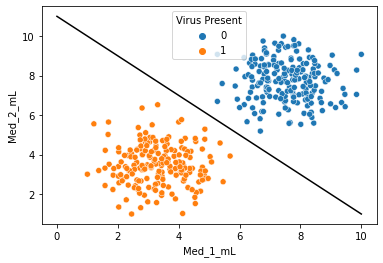

In [6]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', data=df, hue='Virus Present')

# HYPERPLANE (IN 2D IT'S A LINE)
x = np.linspace(0, 10, 100)

m = -1.0
b = 11.0
y = m * x + b

plt.plot(x, y, 'black')

plt.show()

In [7]:
from sklearn.svm import SVC

In [8]:
# help(SVC):  parameters C (inversely proportional to allowed misclassifications), kernel, degree, gamma

In [9]:
# we are skipping scaling and train-test split for now
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

In [10]:
model = SVC(kernel='linear', C=1000)

In [11]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [12]:
from svm_margin_plot import plot_svm_boundary

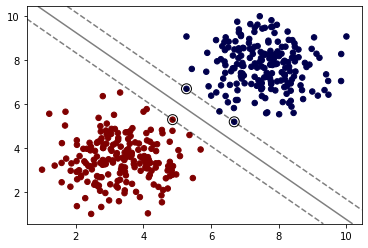

In [13]:
plot_svm_boundary(model, X, y)

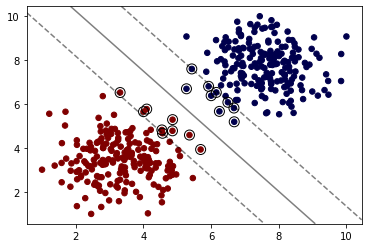

In [14]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)
plot_svm_boundary(model, X, y)

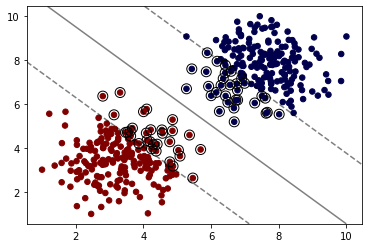

In [15]:
model = SVC(kernel='linear', C=0.005)
model.fit(X, y)
plot_svm_boundary(model, X, y)

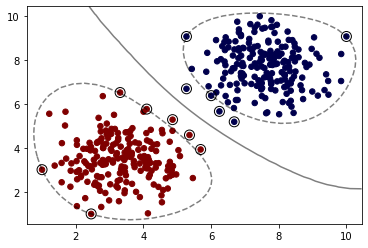

In [23]:
# RADIAL BASIS FUNCTION

model = SVC(kernel='rbf', C=1, gamma='scale')   # scale is fairly balanced
model.fit(X, y)
plot_svm_boundary(model, X, y)

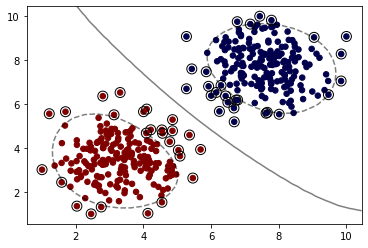

In [17]:
model = SVC(kernel='rbf', C=0.1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

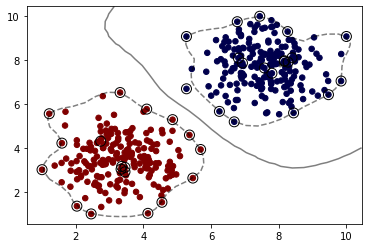

In [21]:
model = SVC(kernel='rbf', C=1, gamma='auto')
model.fit(X, y)
plot_svm_boundary(model, X, y)

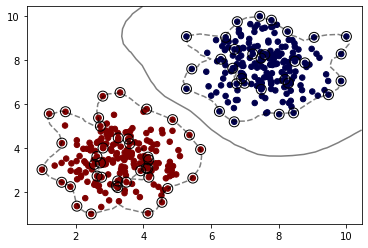

In [22]:
model = SVC(kernel='rbf', C=1, gamma=0.9)
model.fit(X, y)
plot_svm_boundary(model, X, y)

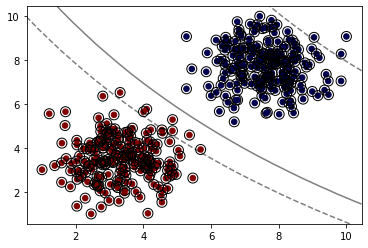

In [24]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model, X, y)

# DO NOT USE sigmoid IN THIS PARTICULAR CASE

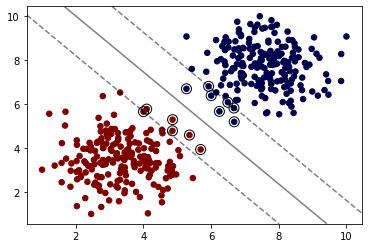

In [25]:
model = SVC(kernel='poly', degree=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

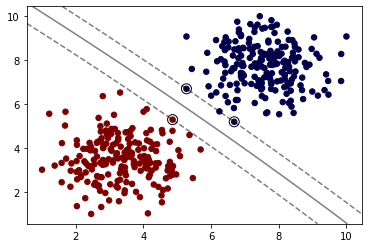

In [26]:
model = SVC(kernel='poly', degree=2)
model.fit(X, y)
plot_svm_boundary(model, X, y)

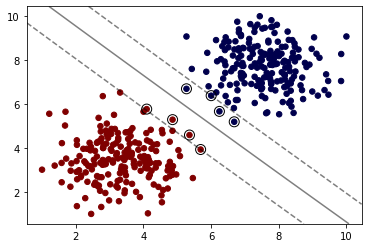

In [28]:
model = SVC(kernel='poly', degree=2, C=0.1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

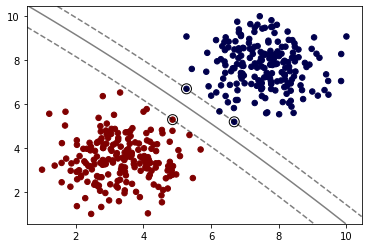

In [29]:
model = SVC(kernel='poly', degree=4, C=0.1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [30]:
# you always need to do a cross validation with SVM
from sklearn.model_selection import GridSearchCV

In [32]:
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1],
              'kernel': ['linear', 'rbf']}

In [33]:
grid = GridSearchCV(svm, param_grid)

In [34]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [35]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}